# Loading data

In [3]:
setwd("C:/R") # set the working directory
clean_data <- readRDS(gzcon(url('https://raw.githubusercontent.com/duongkhanhk29/MERITJUST/main/clean_data.RDS')))
dt <-na.omit(clean_data) # remove all missing data
dim(dt)
colnames(dt)

[1] 454  56

[1] "stfdem"   "stfeco"   "stfedu"   "stfgov"   "stfhlth"  "blgetmg" 
 [7] "brncntr"  "ctzcntr"  "dscrgrp"  "facntr"   "gndr"     "mocntr"  
[13] "impdiff"  "impenv"   "impfree"  "impfun"   "imprich"  "impsafe" 
[19] "imptrad"  "ipadvnt"  "ipbhprp"  "ipcrtiv"  "ipeqopt"  "ipfrule" 
[25] "ipgdtim"  "iphlppl"  "iplylfr"  "ipmodst"  "iprspot"  "ipshabt" 
[31] "ipstrgv"  "ipsuces"  "ipudrst"  "recexp"   "recgndr"  "recimg"  
[37] "recknow"  "recskil"  "sofrdst"  "sofrpr"   "sofrprv"  "sofrwrk" 
[43] "pplhlp"   "pplfair"  "ppltrst"  "eisced"   "eiscedf"  "eiscedm" 
[49] "eiscedp"  "grsplet"  "hinctnta" "isco08"   "isco08p"  "netilet" 
[55] "occf14b"  "occm14b"

# Grouping variables

In [4]:
choose_vars <- read.csv("https://raw.githubusercontent.com/duongkhanhk29/MERITJUST/main/choose_vars.csv")
print(choose_vars[,1:2])

        Var                  Topic
1    stfdem Government performance
2    stfeco Government performance
3    stfedu Government performance
4    stfgov Government performance
5   stfhlth Government performance
6   blgetmg         Discrimination
7   brncntr         Discrimination
8   ctzcntr         Discrimination
9   dscrgrp         Discrimination
10   facntr         Discrimination
11     gndr         Discrimination
12   mocntr         Discrimination
13  impdiff           Human Values
14   impenv           Human Values
15  impfree           Human Values
16   impfun           Human Values
17  imprich           Human Values
18  impsafe           Human Values
19  imptrad           Human Values
20  ipadvnt           Human Values
21  ipbhprp           Human Values
22  ipcrtiv           Human Values
23  ipeqopt           Human Values
24  ipfrule           Human Values
25  ipgdtim           Human Values
26  iphlppl           Human Values
27  iplylfr           Human Values
28  ipmodst         

# Unfolding data

In [7]:
library(smacof)
unfold <- unfolding(dt, type = "ordinal", conditionality = "row")
dt_adj <- setNames(as.data.frame(unfold[["confdist"]]), colnames(dt))
dim(dt_adj)
colnames(dt_adj)

[1] 454  56

[1] "stfdem"   "stfeco"   "stfedu"   "stfgov"   "stfhlth"  "blgetmg" 
 [7] "brncntr"  "ctzcntr"  "dscrgrp"  "facntr"   "gndr"     "mocntr"  
[13] "impdiff"  "impenv"   "impfree"  "impfun"   "imprich"  "impsafe" 
[19] "imptrad"  "ipadvnt"  "ipbhprp"  "ipcrtiv"  "ipeqopt"  "ipfrule" 
[25] "ipgdtim"  "iphlppl"  "iplylfr"  "ipmodst"  "iprspot"  "ipshabt" 
[31] "ipstrgv"  "ipsuces"  "ipudrst"  "recexp"   "recgndr"  "recimg"  
[37] "recknow"  "recskil"  "sofrdst"  "sofrpr"   "sofrprv"  "sofrwrk" 
[43] "pplhlp"   "pplfair"  "ppltrst"  "eisced"   "eiscedf"  "eiscedm" 
[49] "eiscedp"  "grsplet"  "hinctnta" "isco08"   "isco08p"  "netilet" 
[55] "occf14b"  "occm14b"

# Two-dimensional scaling

In [9]:
mds<-as.data.frame(unfold[["conf.col"]]) # extract features
print(mds)

                  D1         D2
stfdem   -1.22508528  0.8336637
stfeco   -1.22147270  0.9797447
stfedu   -1.40467051  0.7501296
stfgov   -1.03541452  0.7663015
stfhlth  -1.24742471  0.8242788
blgetmg  -0.02943878  0.1352590
brncntr  -0.03212067  0.1426970
ctzcntr  -0.03149446  0.1403921
dscrgrp  -0.03135645  0.1375407
facntr   -0.02892768  0.1450706
gndr     -0.05416359  0.1100483
mocntr   -0.03040352  0.1439262
impdiff  -0.14894219 -0.6346544
impenv   -0.05235007 -0.3752518
impfree  -0.15955869 -0.3890392
impfun   -0.01382398 -0.6527621
imprich  -0.28209994 -0.8886047
impsafe  -0.17511617 -0.4717179
imptrad  -0.03838432 -0.5874444
ipadvnt  -0.16442947 -0.8333030
ipbhprp  -0.13608609 -0.5477911
ipcrtiv  -0.11915632 -0.5131443
ipeqopt  -0.06182174 -0.4320552
ipfrule  -0.24527446 -0.7361632
ipgdtim  -0.02310430 -0.5685883
iphlppl  -0.10660432 -0.4103432
iplylfr  -0.03597260 -0.3262388
ipmodst  -0.01280985 -0.5876819
iprspot  -0.17588751 -0.6821298
ipshabt  -0.20101511 -0.6588317
ipstrgv 

# Correlation network

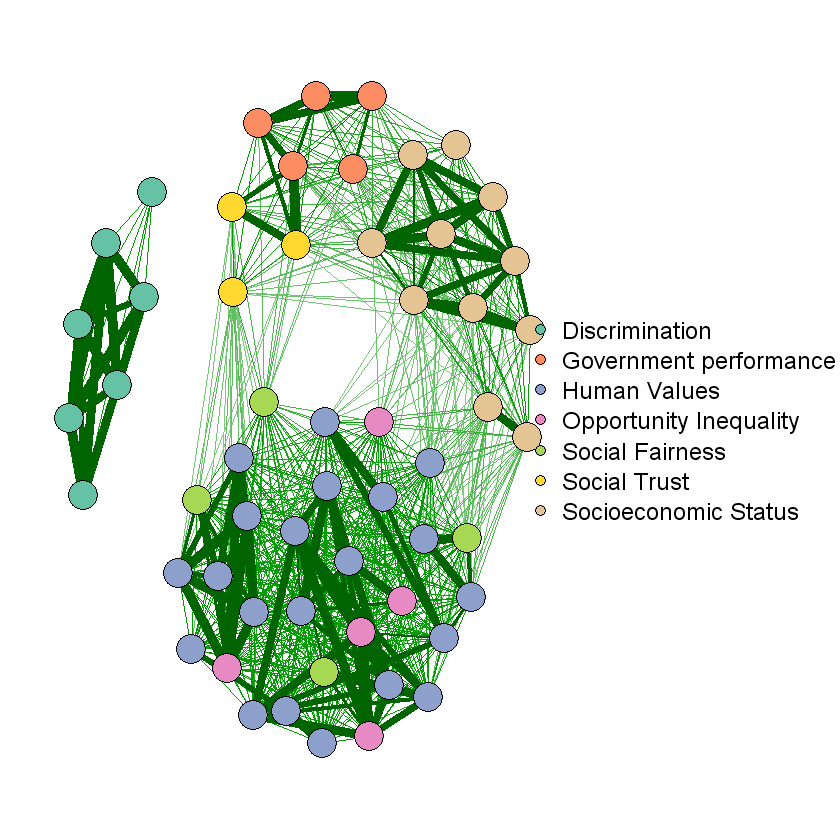

In [8]:
library("RColorBrewer")
Topic_colors <- brewer.pal("Set2",n = length(unique(choose_vars$Topic))) # set colors for topics
library(qgraph) # Plot correlation network
qgraph(abs(cor(dt_adj)), node.width=0.7, labels = F, # correlation size with absolute
       groups=choose_vars$Topic, layout="spring",
       color = Topic_colors, repulsion=0.6,threshold = 0.5) # omit correlation <0.5

# Clustering analysis

In [11]:
library(ggplot2)
library(factoextra)
km <- eclust(mds, "kmeans", nboot = 1000, graph = F) # K-means clustering
hc <- eclust(mds, "hclust", nboot = 1000, graph = F) # Hierarchical clustering (HC)
mds$Topic<-choose_vars$Topic # my clustering
mds$Kmeans<-factor(km$cluster) # clustered by K-means
mds$Hierarchy<-factor(hc$cluster) # clustered by HC
print(mds)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



                  D1         D2                  Topic Kmeans Hierarchy
stfdem   -1.22508528  0.8336637 Government performance      2         1
stfeco   -1.22147270  0.9797447 Government performance      2         1
stfedu   -1.40467051  0.7501296 Government performance      2         1
stfgov   -1.03541452  0.7663015 Government performance      2         1
stfhlth  -1.24742471  0.8242788 Government performance      2         1
blgetmg  -0.02943878  0.1352590         Discrimination      1         2
brncntr  -0.03212067  0.1426970         Discrimination      1         2
ctzcntr  -0.03149446  0.1403921         Discrimination      1         2
dscrgrp  -0.03135645  0.1375407         Discrimination      1         2
facntr   -0.02892768  0.1450706         Discrimination      1         2
gndr     -0.05416359  0.1100483         Discrimination      1         2
mocntr   -0.03040352  0.1439262         Discrimination      1         2
impdiff  -0.14894219 -0.6346544           Human Values      1   

# Visualizing clusters

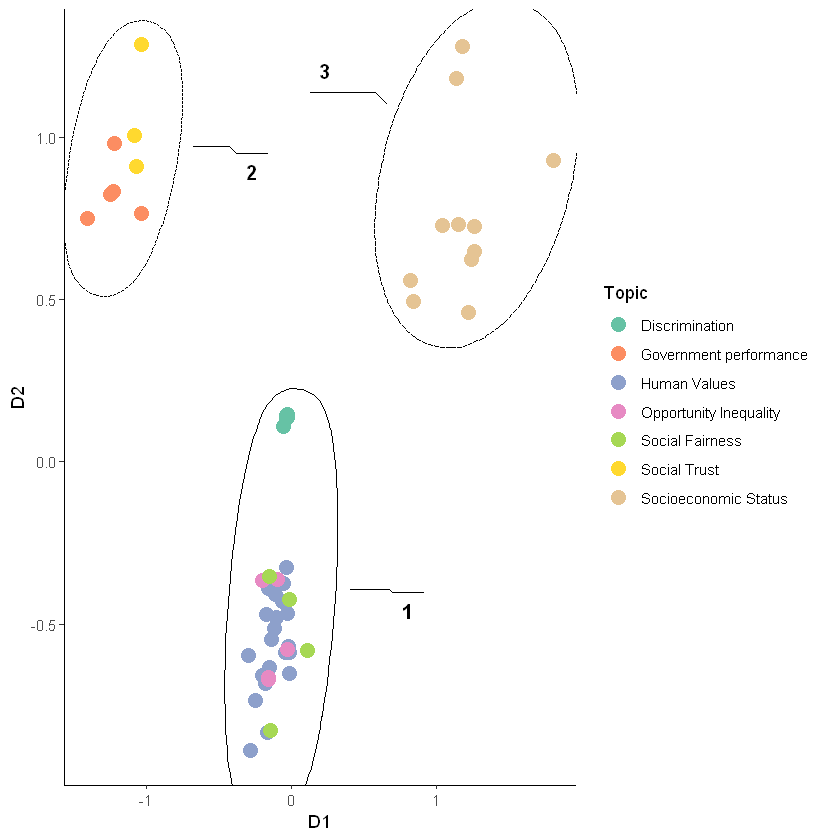

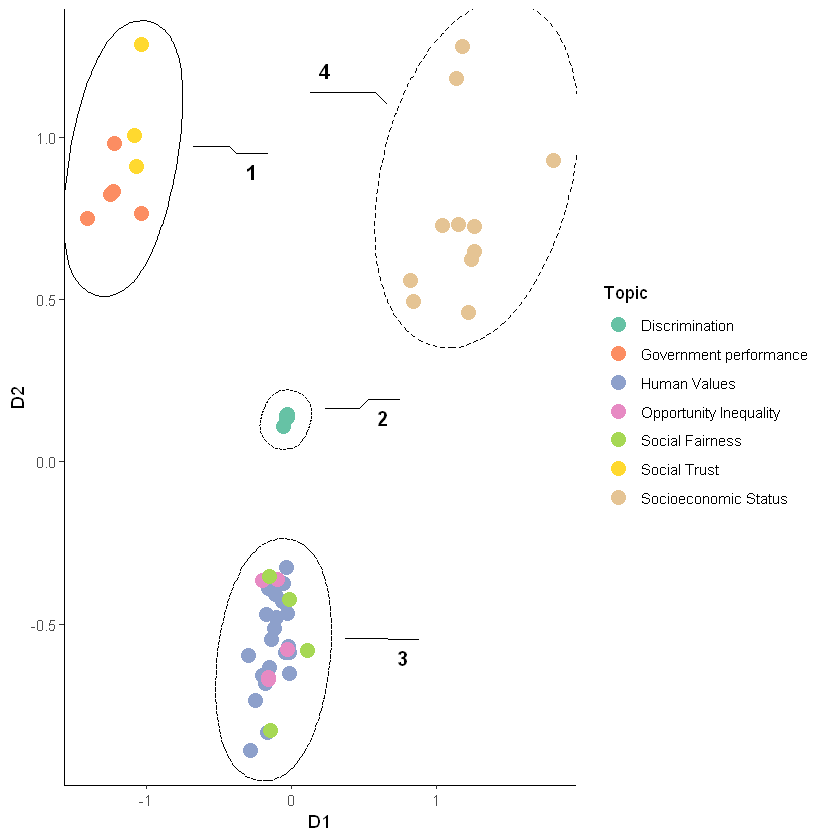

In [11]:
library(ggforce)
mdsplot<- ggplot(mds, aes(D1, D2)) + theme_classic() +
          geom_point(aes(color = Topic), size = 4)+
          scale_color_manual(values=Topic_colors)
mdsplot+geom_mark_ellipse(aes(linetype=Kmeans,label=Kmeans),show.legend=F) # with K-means techniques
mdsplot+geom_mark_ellipse(aes(linetype=Hierarchy,label=Hierarchy),show.legend=F) # with hierarchical clustering

# Unidimensional scaling

In [12]:
unidimension <- function(data, topic) {
  subset_data <- data[, choose_vars$Var[choose_vars$Topic == topic]]
  dts <- dist(t(subset_data))
  mds <- round(sort(uniscale(dts)$conf),3);
  return(mds)
}
unidimension(dt_adj,"Opportunity Inequality")
unidimension(dt_adj,"Social Fairness")

recskil  recexp recknow  recimg recgndr 
 -0.663  -0.636  -0.190   0.671   0.818

sofrprv sofrdst  sofrpr sofrwrk 
 -0.938  -0.135   0.422   0.650

# Double machine learning

In [14]:
library(ranger)
library(data.table)
library(mlr3)
library(mlr3learners)
library(DoubleML)
fit_dml_plr <- function(data, y, d) {
  data = as.data.table(data)
  colnames(data) <- make.names(colnames(data))
  x = setdiff(colnames(data), c(y, d))
  dml_data = DoubleMLData$new(data, y_col = y, d_cols = d, x_cols = x)
  ## Initialization of the Causal PLR Model
  set.seed(31415) # required to replicate sample split
  learner_g = lrn("regr.ranger", num.trees = 500, min.node.size = 2, max.depth = 5)
  learner_m = lrn("regr.ranger", num.trees = 500, min.node.size = 2, max.depth = 5)
  dml_plr = DoubleMLPLR$new(dml_data,ml_m = learner_m, ml_l = learner_g,
                            score = "partialling out", n_folds = 5, n_rep = 1)
  dml_plr$fit(); summary = dml_plr$summary()
}

est_tab <- function(data, x) {
  result_x <- as.data.frame(rbind(
    fit_dml_plr(data, "sofrdst", x),
    fit_dml_plr(data, "sofrpr", x),
    fit_dml_plr(data, "sofrprv", x),
    fit_dml_plr(data, "sofrwrk", x)
  ))
  colnames(result_x) <- c("estimate", "std_error", "t_value", "p_value")
  result_x$model <- c("sofrdst", "sofrpr", "sofrprv", "sofrwrk")
  result_x$var <- x
    return(result_x)
}

merit <- rbind(est_tab(dt_adj,"recskil"),
               est_tab(dt_adj,"recexp"),
               est_tab(dt_adj,"recgndr"),
               est_tab(dt_adj,"recimg"),
               est_tab(dt_adj,"recknow"))

INFO  [14:46:07.860] [mlr3] Applying learner 'regr.ranger' on task 'nuis_l' (iter 1/5)
INFO  [14:46:08.042] [mlr3] Applying learner 'regr.ranger' on task 'nuis_l' (iter 2/5)
INFO  [14:46:08.198] [mlr3] Applying learner 'regr.ranger' on task 'nuis_l' (iter 3/5)
INFO  [14:46:08.358] [mlr3] Applying learner 'regr.ranger' on task 'nuis_l' (iter 4/5)
INFO  [14:46:08.503] [mlr3] Applying learner 'regr.ranger' on task 'nuis_l' (iter 5/5)
INFO  [14:46:08.796] [mlr3] Applying learner 'regr.ranger' on task 'nuis_m' (iter 1/5)
INFO  [14:46:08.948] [mlr3] Applying learner 'regr.ranger' on task 'nuis_m' (iter 2/5)
INFO  [14:46:09.093] [mlr3] Applying learner 'regr.ranger' on task 'nuis_m' (iter 3/5)
INFO  [14:46:09.229] [mlr3] Applying learner 'regr.ranger' on task 'nuis_m' (iter 4/5)
INFO  [14:46:09.369] [mlr3] Applying learner 'regr.ranger' on task 'nuis_m' (iter 5/5)
Estimates and significance testing of the effect of target variables
        Estimate. Std. Error t value Pr(>|t|)  
recskil    0.

# Printing Double machine learning output

In [20]:
print(merit,row.names = FALSE)

    estimate  std_error    t_value       p_value   model     var
  0.64672159 0.28452869  2.2729574  2.302875e-02 sofrdst recskil
  0.41414365 0.26552527  1.5597147  1.188273e-01  sofrpr recskil
  1.15750650 0.08465873 13.6726177  1.479745e-42 sofrprv recskil
  0.47016473 0.20800862  2.2603137  2.380179e-02 sofrwrk recskil
  0.58911838 0.30123138  1.9557006  5.050044e-02 sofrdst  recexp
  0.39801077 0.27322311  1.4567244  1.451925e-01  sofrpr  recexp
  1.10264555 0.07540514 14.6229493  2.005223e-48 sofrprv  recexp
  0.53431136 0.17798319  3.0020326  2.681834e-03 sofrwrk  recexp
 -0.03923815 0.29486450 -0.1330718  8.941366e-01 sofrdst recgndr
  0.47202432 0.13503647  3.4955321  4.731176e-04  sofrpr recgndr
 -0.11114358 0.25651586 -0.4332815  6.648103e-01 sofrprv recgndr
  0.91065989 0.03203778 28.4245671 1.005288e-177 sofrwrk recgndr
 -0.75834926 0.24649032 -3.0765883  2.093842e-03 sofrdst  recimg
 -0.15738978 0.15379581 -1.0233685  3.061337e-01  sofrpr  recimg
 -0.14641783 0.17143683 -

# Plotting Double machine learning output

Warning message:
"Using size for a discrete variable is not advised."


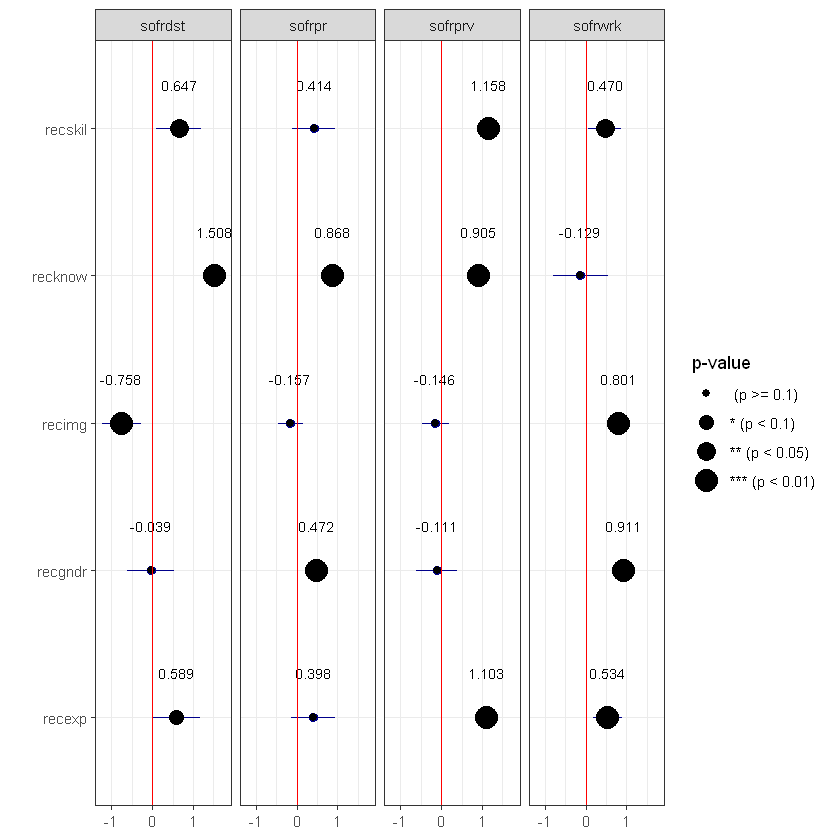

In [21]:
plot_results <- function(dt) {
  results = dt
  # calculate the lower and upper bounds of the 95% confidence intervals
  results$conf_low <- results$estimate - 1.96*results$std_error
  results$conf_high <- results$estimate + 1.96*results$std_error
  # create a factor variable for the p-value significance levels
  results$p_value_level <- cut(
    results$p_value,
    breaks = c(-Inf, 0.01, 0.05, 0.1, Inf),
    labels = c("*** (p < 0.01)", "** (p < 0.05)", "* (p < 0.1)", " (p >= 0.1)")
  )
  # plot the estimates with error bars and size the points according to the p-value levels
  ggplot(results, aes(x = var, y = estimate)) +
    geom_pointrange(aes(ymin = conf_low, ymax = conf_high), color = "darkblue") +
    geom_point(aes(size = p_value_level)) +
    geom_text(aes(label = sprintf("%.3f", estimate)), nudge_x = 0.3, size=3) +
    scale_x_discrete("") + geom_hline(yintercept = 0, color = "red") +
    theme_bw() + ylab(NULL) + 
    scale_size_discrete(name = "p-value",limits = rev(levels(results$p_value_level))) +
    coord_flip() + facet_grid(~model)
}
plot_results(merit)